## 1. load data

In [3]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import pydicom, numpy as np

In [6]:
def parse_data(df):

    # --- Define lambda to extract coords in list [y, x, height, width]
    extract_box = lambda row: [row['y'], row['x'], 
    row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows():
        # --- Initialize patient entry into parsed 
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': './data/stage_2_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []}

        # --- Add box if opacity is present
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))

    return parsed

df = pd.read_csv('./data/stage_2_train_labels.csv')

patient_class = pd.read_csv('./data/stage_2_detailed_class_info.csv', index_col=0)

parsed = parse_data(df)

patientId = df['patientId'][0]
print('Just a checking that everything is working fine...')
print(parsed[patientId])
print(patient_class.loc[patientId])

Just a checking that everything is working fine...
{'dicom': './data/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm', 'label': 0, 'boxes': []}
class    No Lung Opacity / Not Normal
Name: 0004cfab-14fd-4e49-80ba-63a80b6bddd6, dtype: object


In [8]:
def draw(data):
    """
    Method to draw single patient with bounding box(es) if present 

    """

    # --- Open DICOM file
    d = pydicom.read_file(data['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data['boxes']:
        rgb = np.floor(np.random.rand(3) * 256).astype('int')
        im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    plt.imshow(im, cmap=plt.cm.gist_gray)
    plt.axis('off')

In [7]:
def overlay_box(im, box, rgb, stroke=1):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

## 2. 시각화

1)) normal image

class    Normal
Name: 003d8fa0-6bf1-40ed-b54c-ac657f8495c5, dtype: object


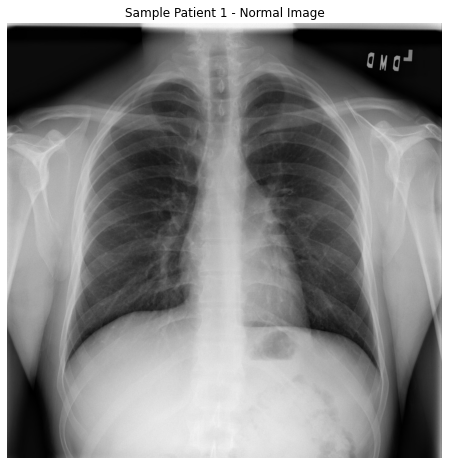

In [9]:
patientId = df['patientId'][3]
print(patient_class.loc[patientId])

plt.figure(figsize=(10,8))
plt.title("Sample Patient 1 - Normal Image")

draw(parsed[patientId])

- Black = Air
- White = Bone
- Grey = Tissue or Fluid

2)) lung opacity image

                                             class
patientId                                         
00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity


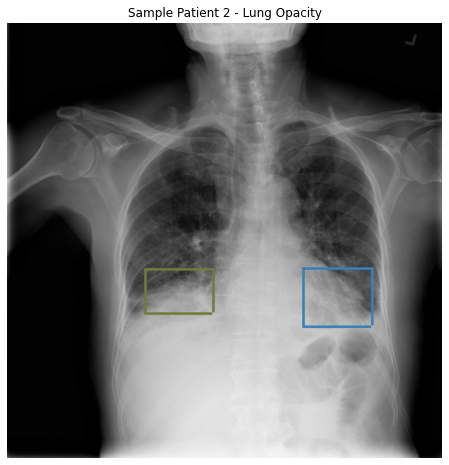

In [10]:
patientId = df['patientId'][8]
print(patient_class.loc[patientId])

plt.figure(figsize=(10,8))
plt.title("Sample Patient 2 - Lung Opacity")

draw(parsed[patientId])

3)) normal vs lung opacity images

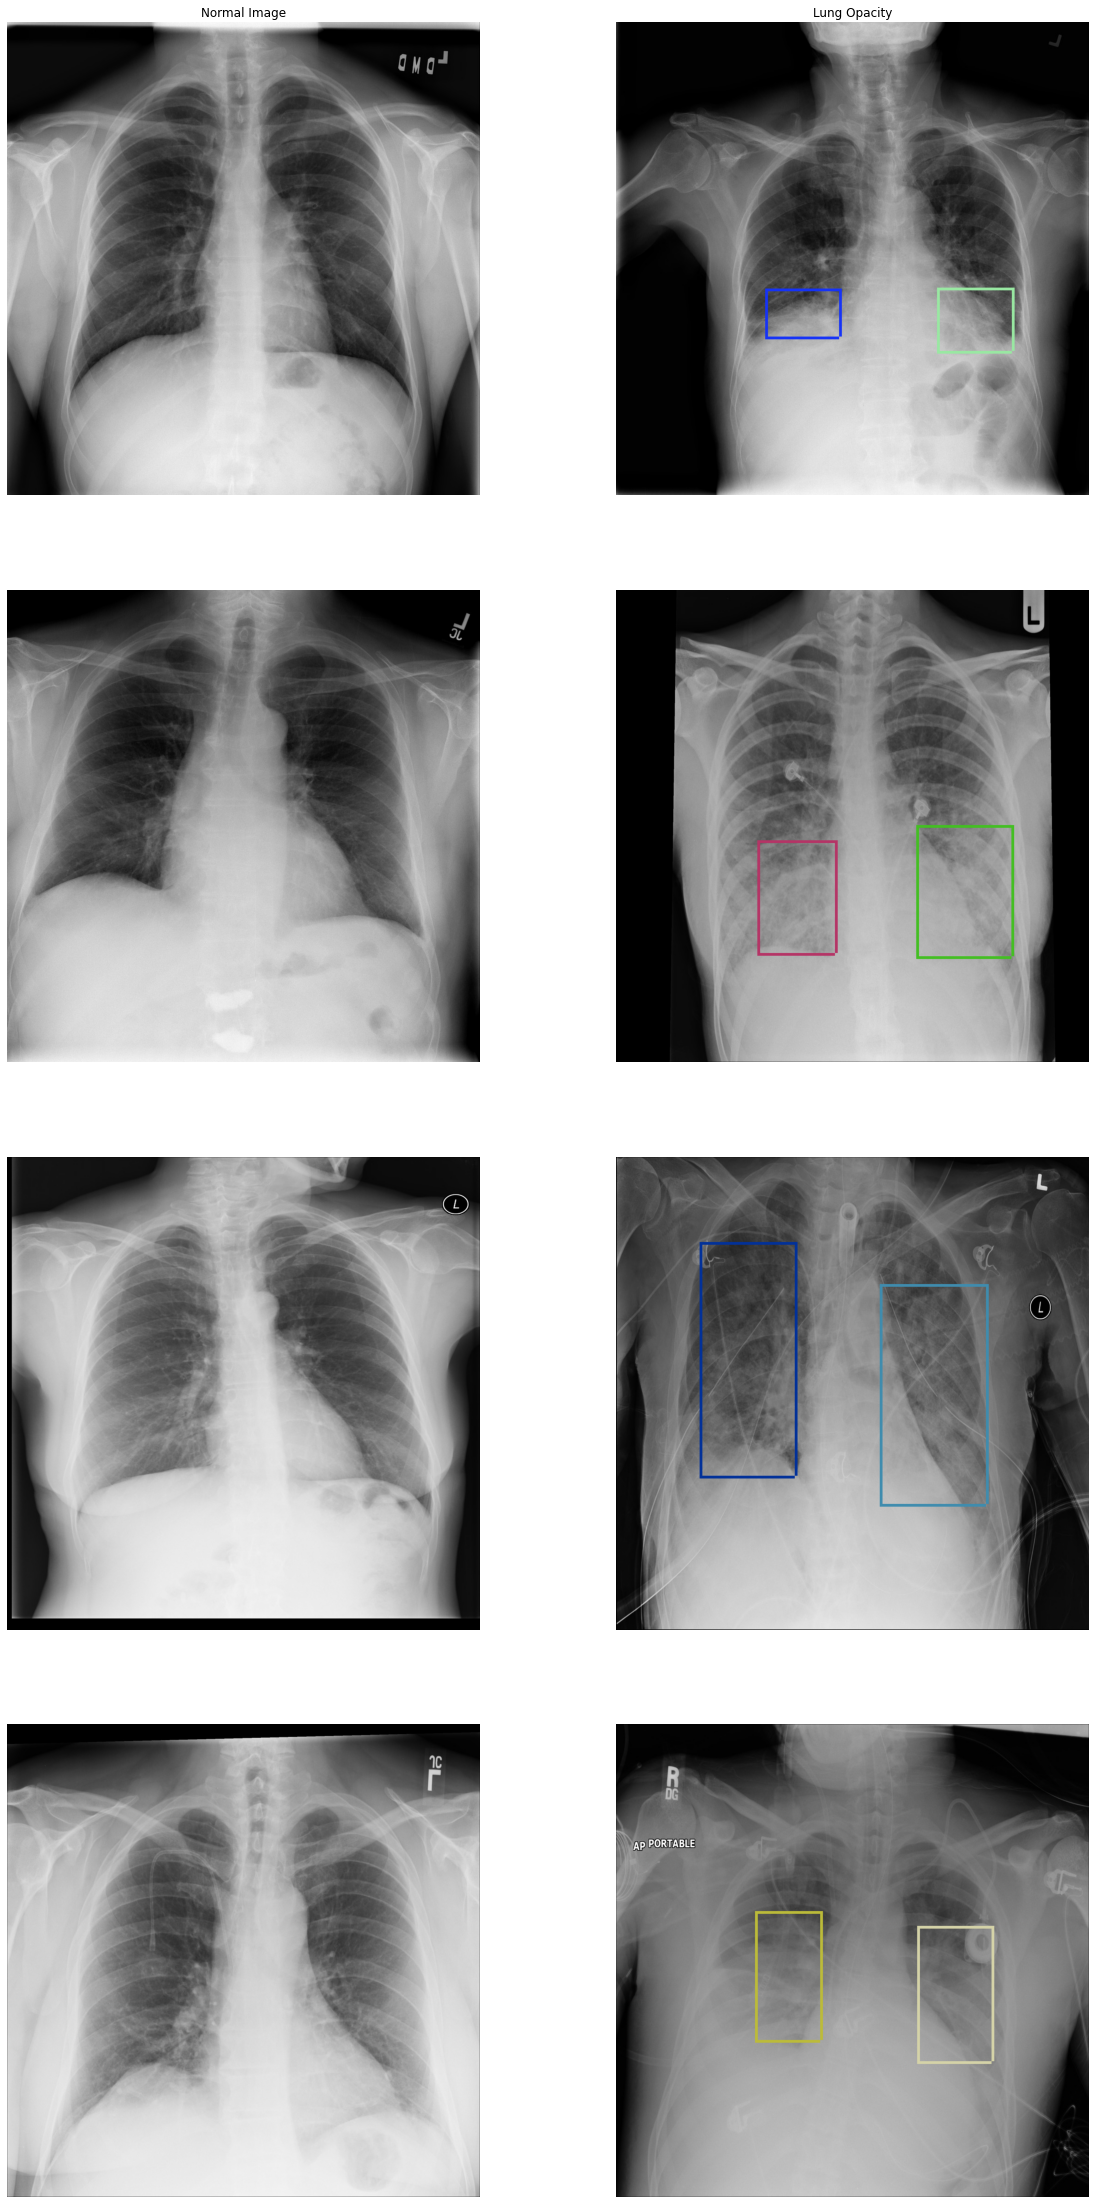

In [11]:
plt.figure(figsize=(20, 40))

plt.subplot(421)
plt.title("Normal Image")

draw(parsed[df['patientId'][3]])

plt.subplot(423)
draw(parsed[df['patientId'][11]])

plt.subplot(425)
draw(parsed[df['patientId'][12]])

plt.subplot(427)
draw(parsed[df['patientId'][13]])

plt.subplot(422)
plt.title("Lung Opacity")

draw(parsed[df['patientId'][8]])

plt.subplot(424)
draw(parsed[df['patientId'][16]])

plt.subplot(426)
draw(parsed[df['patientId'][19]])

plt.subplot(428)
draw(parsed[df['patientId'][24]])

4)) more closer look

class    No Lung Opacity / Not Normal
Name: 00322d4d-1c29-4943-afc9-b6754be640eb, dtype: object


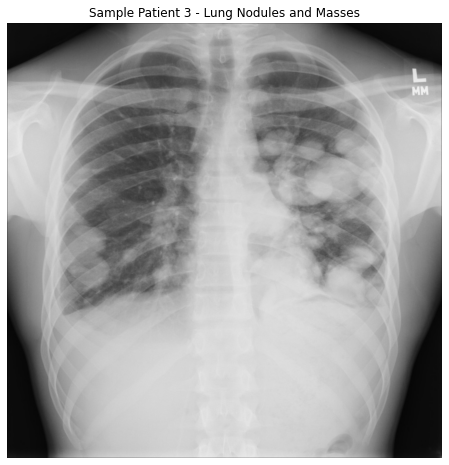

In [12]:
patientId = df['patientId'][2]
print(patient_class.loc[patientId])

plt.figure(figsize=(10,8))
plt.title("Sample Patient 3 - Lung Nodules and Masses")
draw(parsed[patientId])

5)) 폐렴을 혼탁하게 만드는건 무엇?

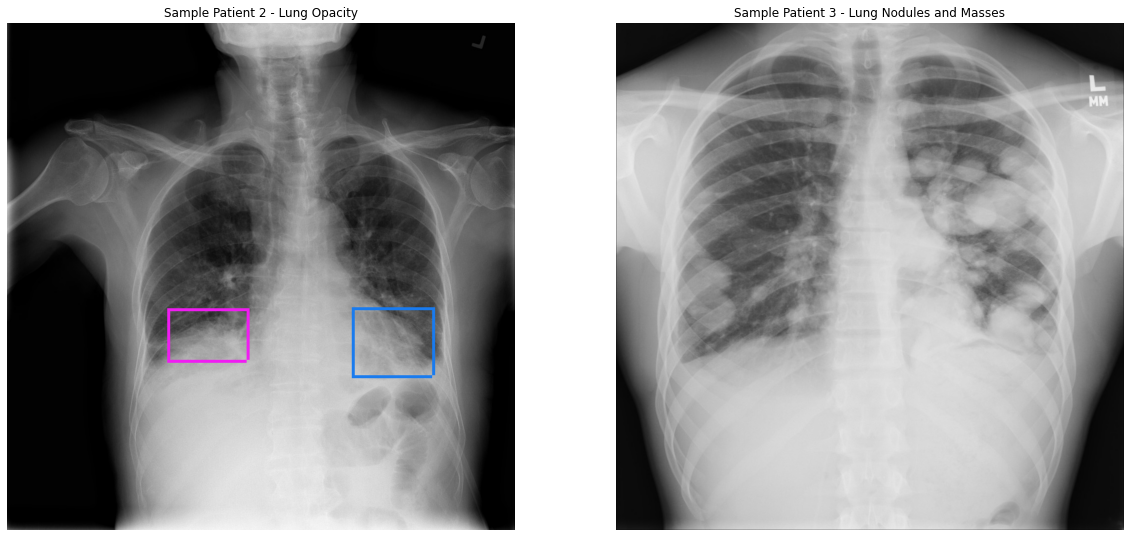

In [13]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 2 - Lung Opacity")
draw(parsed[df['patientId'][8]])

plt.subplot(122)
plt.title("Sample Patient 3 - Lung Nodules and Masses")
draw(parsed[df['patientId'][2]])

6)) 통합 vs 지상 유리 불투명도

                                             class
patientId                                         
010ccb9f-6d46-4380-af11-84f87397a1b8  Lung Opacity
010ccb9f-6d46-4380-af11-84f87397a1b8  Lung Opacity
                                             class
patientId                                         
012a5620-d082-4bb8-9b3b-e72d8938000c  Lung Opacity
012a5620-d082-4bb8-9b3b-e72d8938000c  Lung Opacity


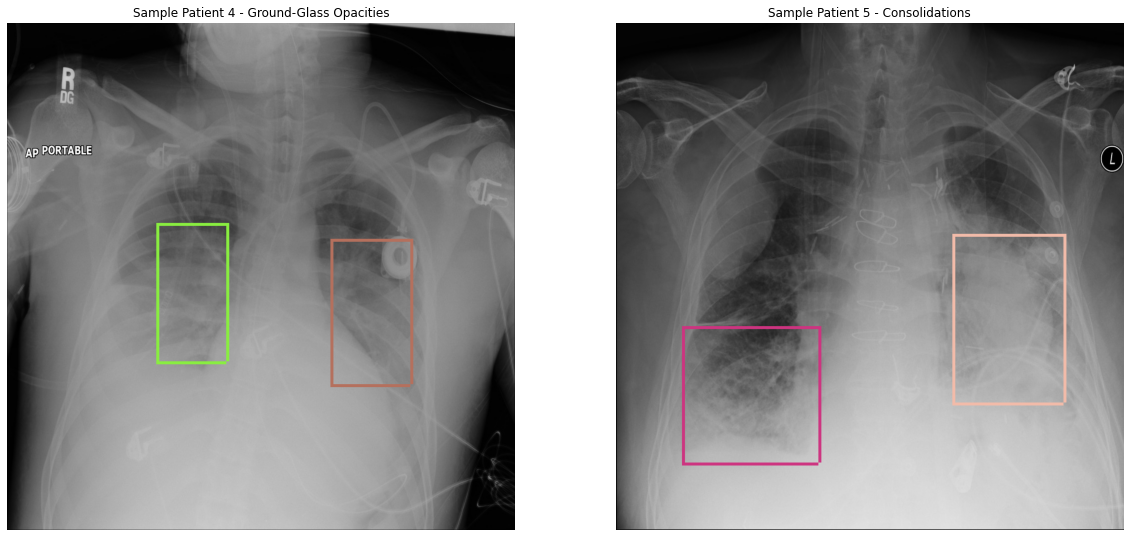

In [14]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 4 - Ground-Glass Opacities")
draw(parsed[df['patientId'][25]])
print(patient_class.loc[df['patientId'][25]])

plt.subplot(122)
plt.title("Sample Patient 5 - Consolidations")
draw(parsed[df['patientId'][28]])
print(patient_class.loc[df['patientId'][28]])

7)) 폐렴과 관련이 없는 혼탁

class    Normal
Name: 01cc7c75-4498-43ab-b650-5553d0507f76, dtype: object
class    No Lung Opacity / Not Normal
Name: 03ab53d0-0a93-43f7-bfb7-4fc5b4db75dc, dtype: object


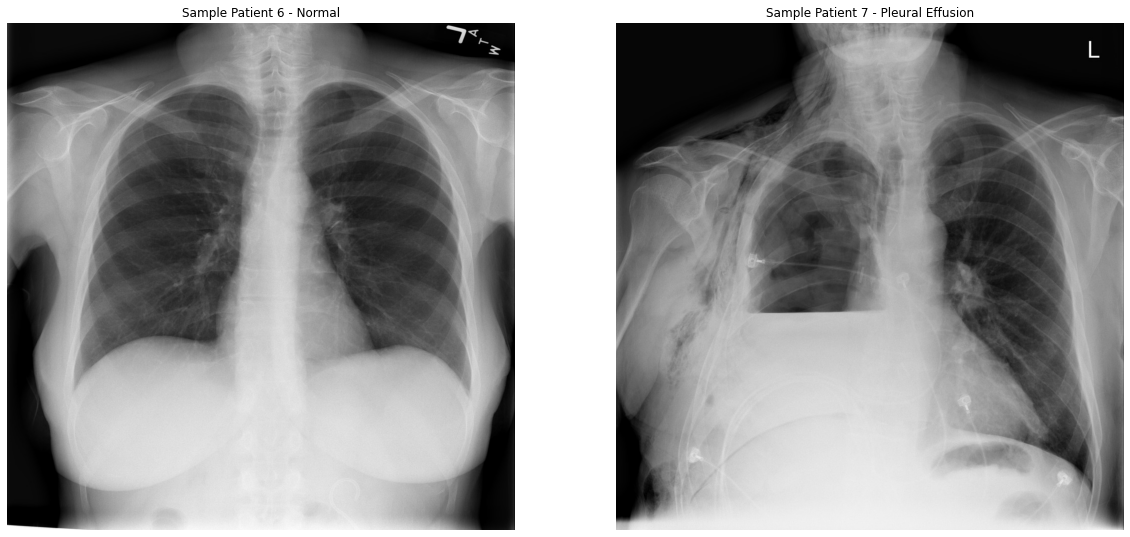

In [15]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 6 - Normal")
draw(parsed[df['patientId'][59]])
print(patient_class.loc[df['patientId'][59]])

plt.subplot(122)
plt.title("Sample Patient 7 - Pleural Effusion")
draw(parsed[df['patientId'][125]])
print(patient_class.loc[df['patientId'][125]])

8)) 폐 덩어리 및 결절

class    Normal
Name: 01cc7c75-4498-43ab-b650-5553d0507f76, dtype: object
class    No Lung Opacity / Not Normal
Name: 00322d4d-1c29-4943-afc9-b6754be640eb, dtype: object


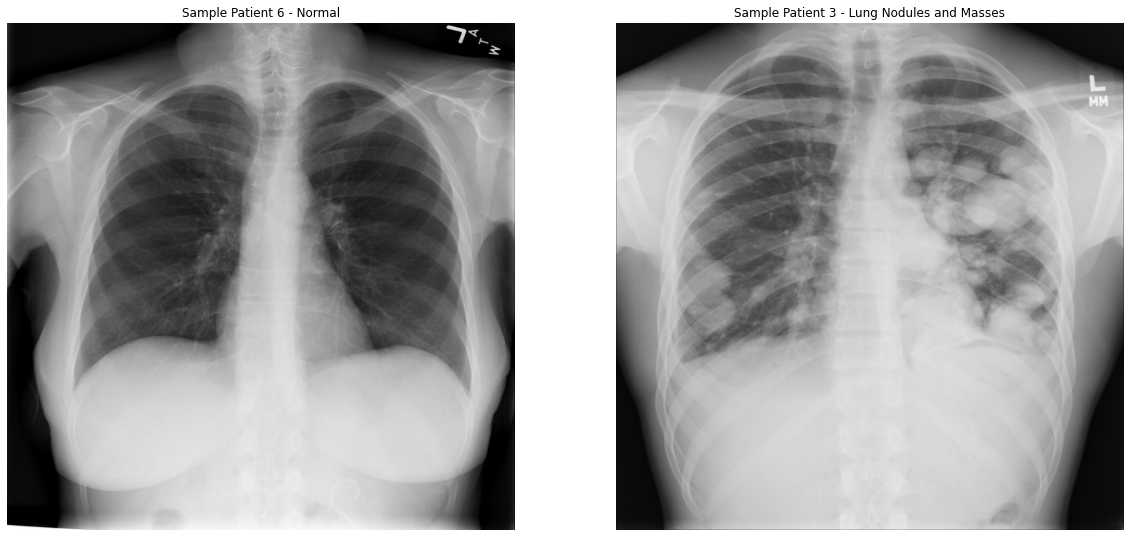

In [16]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 6 - Normal")
draw(parsed[df['patientId'][59]])
print(patient_class.loc[df['patientId'][59]])

plt.subplot(122)
plt.title("Sample Patient 3 - Lung Nodules and Masses")
draw(parsed[df['patientId'][2]])
print(patient_class.loc[df['patientId'][2]])

8)) 혈관 표시 증가 + 심장 확대

class    Normal
Name: 01cc7c75-4498-43ab-b650-5553d0507f76, dtype: object
class    No Lung Opacity / Not Normal
Name: 019e035e-2f82-4c66-a198-57422a27925f, dtype: object


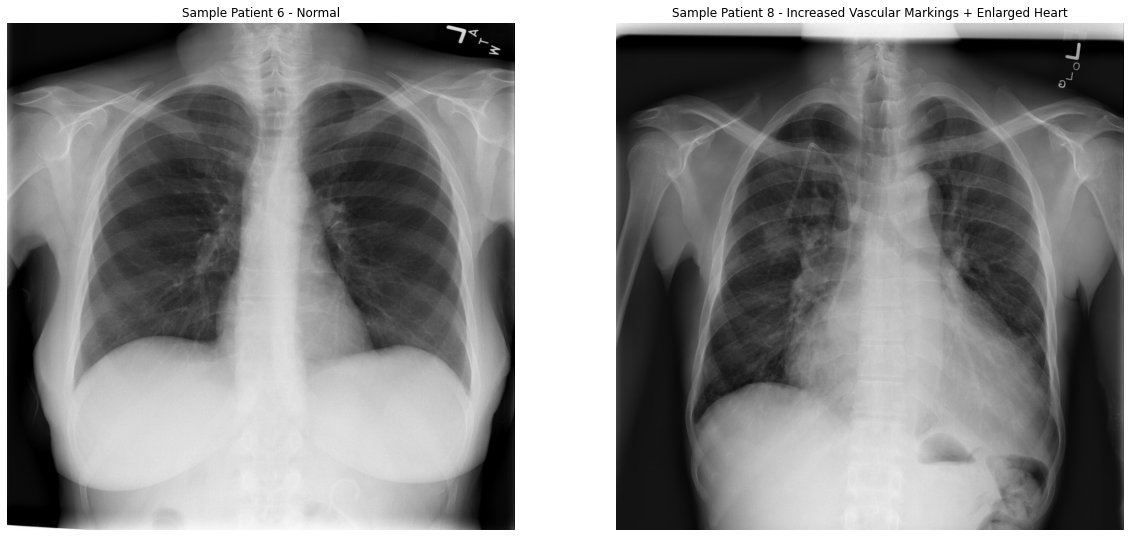

In [17]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 6 - Normal")
draw(parsed[df['patientId'][59]])
print(patient_class.loc[df['patientId'][59]])

plt.subplot(122)
plt.title("Sample Patient 8 - Increased Vascular Markings + Enlarged Heart")
draw(parsed[df['patientId'][38]])
print(patient_class.loc[df['patientId'][38]])

9)) 흰 폐

class    Normal
Name: 01cc7c75-4498-43ab-b650-5553d0507f76, dtype: object
class    Lung Opacity
Name: 924f4f8b-fc27-4dfd-b5ae-59c40715e150, dtype: object
class    Lung Opacity
Name: 17a5ce04-809a-42ed-9e58-100cfb33de7a, dtype: object
class    Lung Opacity
Name: 9dde630b-1f95-46e6-bcde-117eee4c7283, dtype: object


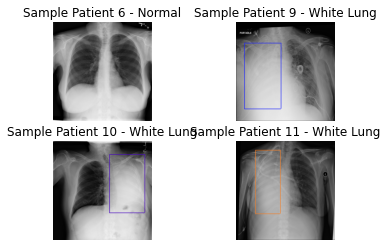

In [18]:

plt.subplot(221)
plt.title("Sample Patient 6 - Normal")
draw(parsed[df['patientId'][59]])
print(patient_class.loc[df['patientId'][59]])

plt.subplot(222)
plt.title("Sample Patient 9 - White Lung")
draw(parsed['924f4f8b-fc27-4dfd-b5ae-59c40715e150'])
print(patient_class.loc['924f4f8b-fc27-4dfd-b5ae-59c40715e150'])

plt.subplot(223)
plt.title("Sample Patient 10 - White Lung")
draw(parsed['17a5ce04-809a-42ed-9e58-100cfb33de7a'])
print(patient_class.loc['17a5ce04-809a-42ed-9e58-100cfb33de7a'])

plt.subplot(224)
plt.title("Sample Patient 11 - White Lung")
draw(parsed['9dde630b-1f95-46e6-bcde-117eee4c7283'])
print(patient_class.loc['9dde630b-1f95-46e6-bcde-117eee4c7283'])

10)) 불명확한 환상체

class    Normal
Name: 01cc7c75-4498-43ab-b650-5553d0507f76, dtype: object
class    No Lung Opacity / Not Normal
Name: 01a5594f-e5d4-4f7a-b79d-3f57559fe37b, dtype: object


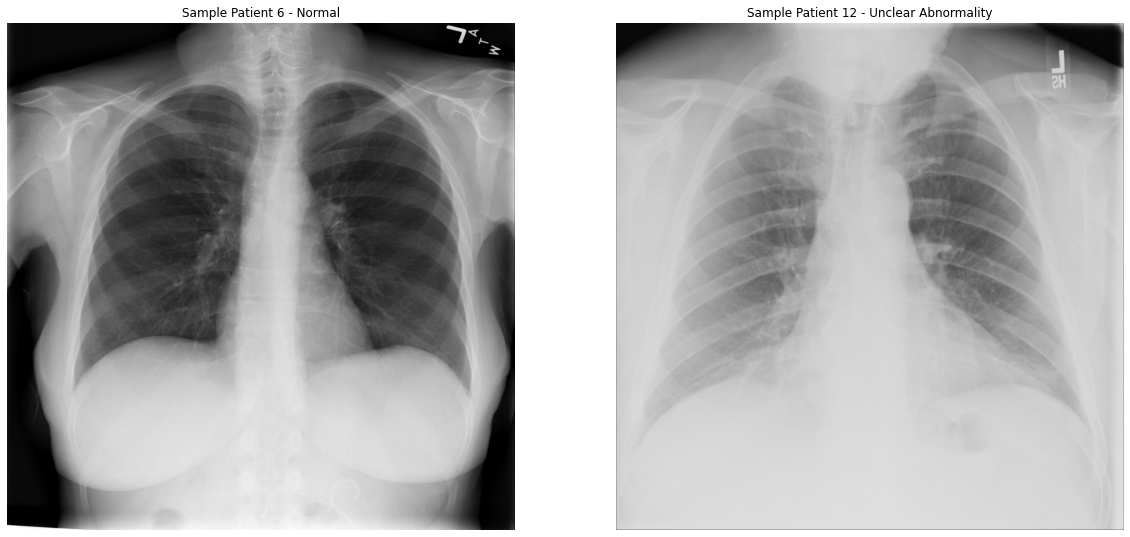

In [19]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 6 - Normal")
draw(parsed[df['patientId'][59]])
print(patient_class.loc[df['patientId'][59]])

plt.subplot(122)
plt.title("Sample Patient 12 - Unclear Abnormality")
draw(parsed[df['patientId'][40]])
print(patient_class.loc[df['patientId'][40]])

class    Normal
Name: 01cc7c75-4498-43ab-b650-5553d0507f76, dtype: object
class    No Lung Opacity / Not Normal
Name: 02c2331d-b3fa-4d55-bf86-f0efbd589c86, dtype: object


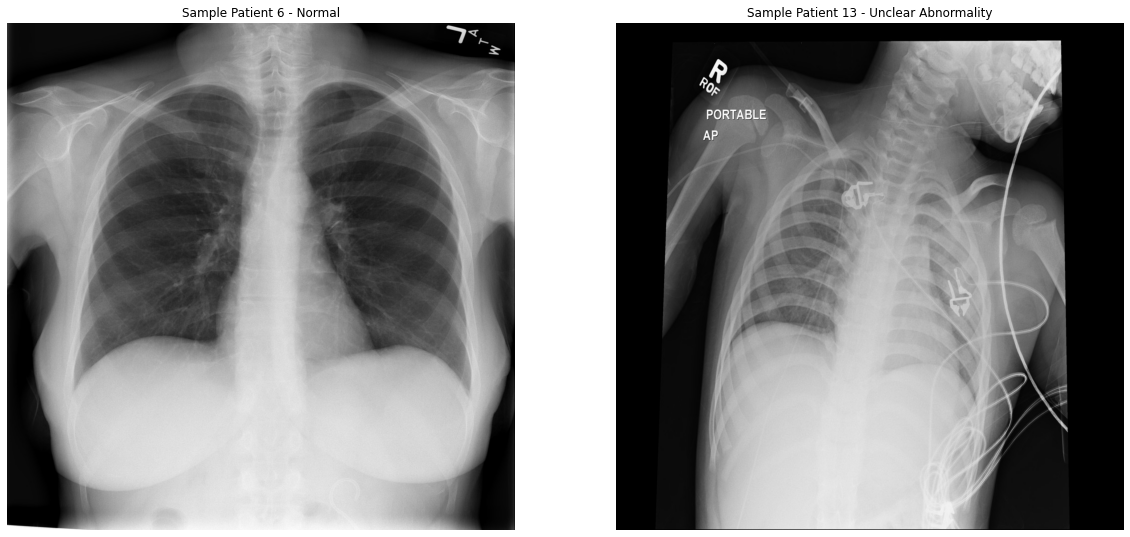

In [20]:
plt.figure(figsize=(20, 40))

plt.subplot(121)
plt.title("Sample Patient 6 - Normal")
draw(parsed[df['patientId'][59]])
print(patient_class.loc[df['patientId'][59]])

plt.subplot(122)
plt.title("Sample Patient 13 - Unclear Abnormality")
draw(parsed[df['patientId'][106]])
print(patient_class.loc[df['patientId'][106]])